# Assignment 3

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
from sklearn.model_selection import train_test_split
import tensorflow as tf
from matplotlib import pyplot as plt

2024-06-02 23:23:18.537799: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-02 23:23:18.539743: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-02 23:23:18.578751: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 23:23:18.578791: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 23:23:18.579953: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

This lab continues our study of linear regression. You'll train your first models with Tensorflow, using a real dataset to predict car prices from their features. Note that Tensorflow is a rapidly changing library. This means you'll often see warnings about deprecations. You can ignore the warnings in our labs.

---
### Step 1: Data ingestion

You'll use the [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/automobile)  from 1985 Ward's Automotive Yearbook that is part of the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets).

In [2]:
# Provide the names for the feature columns since the CSV file with the data 
# does not have a header row.
cols = ['symboling', 'losses', 'make', 'fuel-type', 'aspiration', 'num-doors',
        'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
        'length', 'width', 'height', 'weight', 'engine-type', 'num-cylinders',
        'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
        'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Load the data from a CSV file into a pandas dataframe. Remember that each row
# is an example and each column in a feature.
car_data_init = pd.read_csv(
    'https://storage.googleapis.com/ml_universities/cars_dataset/cars_data.csv',
    sep=',', names=cols, header=None, encoding='latin-1')

# Display top five rows
print('Shape of data:', car_data_init.shape)
car_data_init.head()

Shape of data: (205, 26)


,symboling,losses,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


---
### Step 2: Data preprocessing

This step is essential for preparing the data in a format that is suitable for ML algorithms. It helps ensure data quality and improvements in model performance.

### <span style="color:chocolate">Exercise 1:</span> Column selection (5 points)

To keep things simple, you will:

1. Retain only the following columns: ['horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']. Name the new dataframe *car_data*.
2. Display the data type of each column;
3. Convert the data type of each columns to numeric. Coerce missing values to NaN. Hint: use <span style="color:chocolate">pd.to_numeric()</span> method;
4. Display the data type of each column after the transformation performed at point 3.

In [3]:
# YOUR CODE HERE
car_data = car_data_init[['horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].copy()
car_data.info()

car_data['horsepower'] = pd.to_numeric(car_data['horsepower'], errors = "coerce")
car_data['peak-rpm'] = pd.to_numeric(car_data['peak-rpm'], errors = "coerce")
car_data['price'] = pd.to_numeric(car_data['price'], errors = "coerce")
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   horsepower   205 non-null    object
 1   peak-rpm     205 non-null    object
 2   city-mpg     205 non-null    int64 
 3   highway-mpg  205 non-null    int64 
 4   price        205 non-null    object
dtypes: int64(2), object(3)
memory usage: 8.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   horsepower   203 non-null    float64
 1   peak-rpm     203 non-null    float64
 2   city-mpg     205 non-null    int64  
 3   highway-mpg  205 non-null    int64  
 4   price        201 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 8.1 KB


### <span style="color:chocolate">Exercise 2:</span> Example (row) selection (5 points)

To keep things simple again, you will:

1. Print the shape of the car_data;

2. Remove examples (rows) that have missing value(s). Note that in doing so, you will overwrite the car_data dataset. You should end up with 197 examples after this cleaning.

3. Print the shape of the car_data again.

It's important to acknowledge that there are multiple approaches to handling missing features, and simply discarding examples with any missing feature, though straightforward, may not be the most optimal solution. However, for the sake of simplicity, you will implement this strategy in this assignment.

In [4]:
# YOUR CODE HERE
print(f"{car_data.shape = }")
car_data.dropna(inplace = True)
print(f"{car_data.shape = }")

car_data.shape = (205, 5)
car_data.shape = (199, 5)


### <span style="color:chocolate">Exercise 3:</span> Data shuffling (10 points)

Since you'll be using Batch Gradient Descent (BGD) for training, it is important that **each batch is a random sample of the data** so that the gradient computed is representative. Note that the original data (above) appears sorted by *make* in alphabetic order.

Using NumPy and Pandas methods:

1. Create a list of indices corresponding to the rows in the car_data dataset. Call this list *indices*. Print this list;

2. Shuffle *indices* using the <span style="color:chocolate">np.random.permutation()</span> method. Call the resulting array *shuffled_indices*. Print this array;
    
3. Use the method <span style="color:chocolate">dataframe.reindex()</span> to change the ordering of the car_data dataset based on the order in the *shuffled_indices* array. Note that in doing so, you will overwrite the original dataset. Print the top 5 rows.

In [5]:
np.random.seed(0)
# YOUR CODE HERE
indices = car_data.index
print(f"{indices = }")

shuffled_indices = np.random.permutation(indices)
print(f"{shuffled_indices = }")

car_data = car_data.reindex(index = shuffled_indices)
print(car_data.head())

indices = Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,
       ...
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204],
      dtype='int64', length=199)
shuffled_indices = array([ 19, 175, 109,  95, 182, 189,   5, 145,  13, 166,  64, 127, 170,
       151,  83,   7,  34, 135,  38,  77, 165, 150,  48, 164,  63, 125,
       184, 190, 100,  47,  17,  58,  86, 113,  23, 194, 141,   4, 143,
       199, 159,  69,  27, 137, 152,  66,   8,  78, 101, 172,  74, 202,
        89,  99, 155,  25,  31, 116,  41,  59, 136, 188, 186,  20, 158,
       142,  57, 168,  54, 115, 144,  92,  93, 126, 149, 187, 111,  15,
        28, 104, 121,  49, 200, 110,  65,   2,  62, 179, 132,  46,  11,
       192,  76, 197, 183, 173, 128,  96, 114, 163, 196,  53,   0,  97,
       112,  98,  67, 147,  42,  72,  52,  51,  88,  14, 156,  24, 191,
       140,  21,  16,  81, 107,  55, 103,  79,   3, 119, 169, 203,   6,
        71,  87, 124, 160, 176, 161,  94, 177,  12, 122, 105,  36,  60,
        68,   1, 123

### <span style="color:chocolate">Exercise 4:</span> Define outcome and features (5 points)

Create two dataframes as follows:

1. The first dataframe contains our outcome of interest: ['price']. Note, this is what we are aiming to predict. Name this dataframe Y. Print shape of Y.
2. The second dataframe contains our features of interest: ['horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']. Name this dataframe X. Print shape of X.


In [6]:
# YOUR CODE HERE
Y = car_data[["price"]]
print(f"{Y.shape = }")

X = car_data[['horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']]
print(f"{X.shape = }")

Y.shape = (199, 1)
X.shape = (199, 4)


### <span style="color:chocolate">Exercise 5:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Partition the (X, Y) data into training, validation, and test sets using a splitting rule of [60%, 20%, 20%], with a random state set to 1234. Name the resulting dataframes as follows: X_train, X_val, X_test, Y_train, Y_val, Y_test. Hint: To create these three partitions you will utilize the train_test_split() method twice. You should obtain [119, 40, 40] examples for training, validation, and test, respectively.
2. Print the shape of each dataframe.

Note: The validation set is crucial for evaluating different hyperparameter configurations and selecting those that yield optimal model performance. This approach avoids utilizing the test dataset during model training, as it is assumed to be "unknown" at that stage.

In [7]:
# YOUR CODE HERE
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.5, random_state = 42)

print(f"{X_train.shape = },\t{Y_train.shape = }")
print(f"{X_val.shape = },\t\t{Y_val.shape = }")
print(f"{X_test.shape = },\t\t{Y_test.shape = }")

X_train.shape = (119, 4),	Y_train.shape = (119, 1)
X_val.shape = (40, 4),		Y_val.shape = (40, 1)
X_test.shape = (40, 4),		Y_test.shape = (40, 1)


### <span style="color:chocolate">Exercise 6:</span> Data standardization (10 points)

With this concept in mind, complete the following tasks:

1. Output the quantile values (0.25, 0.5, 0.75, 0.95) for all features in the X_train dataset. Are these values uniformly scaled across features?

2. Standardize all features in X_train, X_val, and X_test. Label the resulting dataframes as X_train_std, X_val_std, and X_test_std, respectively. Hint: standardize the validation and test data using the mean and standard deviation computed from the training data. Why?

3. Similar to point 2. but now standardize the outcome variable. Label the resulting dataframes as Y_train_std, Y_val_std, and Y_test_std.

In [8]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

print(X_train.describe(percentiles = [0.25, 0.5, 0.75, 0.95]))
print("These features are not scale uniformly.")

x_scaler = StandardScaler()
x_scaler.fit(X_train)
X_train_std = x_scaler.transform(X_train)
X_val_std = x_scaler.transform(X_val)
X_test_std = x_scaler.transform(X_test)


y_scaler = StandardScaler()
y_scaler.fit(Y_train.values.reshape(-1, 1))

Y_train_std = y_scaler.transform(Y_train.values.reshape(-1, 1))
Y_val_std = y_scaler.transform(Y_val.values.reshape(-1, 1))
Y_test_std = y_scaler.transform(Y_test.values.reshape(-1, 1))

       horsepower     peak-rpm    city-mpg  highway-mpg
count  119.000000   119.000000  119.000000   119.000000
mean   103.924370  5058.823529   24.941176    30.302521
std     38.065991   448.804771    6.185404     6.735379
min     48.000000  4150.000000   13.000000    16.000000
25%     70.000000  4800.000000   19.000000    25.000000
50%     95.000000  5100.000000   25.000000    30.000000
75%    118.000000  5400.000000   29.500000    34.000000
95%    176.600000  5800.000000   37.000000    41.200000
max    262.000000  6600.000000   47.000000    53.000000
These features are not scale uniformly.


---
### Step 3: Exploratory data analysis (EDA)

EDA plays a very important role in ML. The goal here is to develop a good understanding of our dataset, identify any data quality issues, understand patterns and relationships, which in turn, aids in subsequent modeling and interpretations.

### <span style="color:chocolate">Exercise 7:</span> Scatterplot matrix (10 points)

In this exercise you will use some simple yet useful techniques to visualize the distribution of the data. 

Let's start with:

1. A scatterplot matrix to visualize the pair-wise correlations between different features and outcome in the (X_train_std, Y_train_std) data. You will use the <span style="color:chocolate">sns.pairplot()</span> method from the seaborn library imported at the top of the notebook;
2. Is any of the variables in the data normally distributed? Is it necessary for the explanatory or target variable to be normally distributed in order to train a ML model?

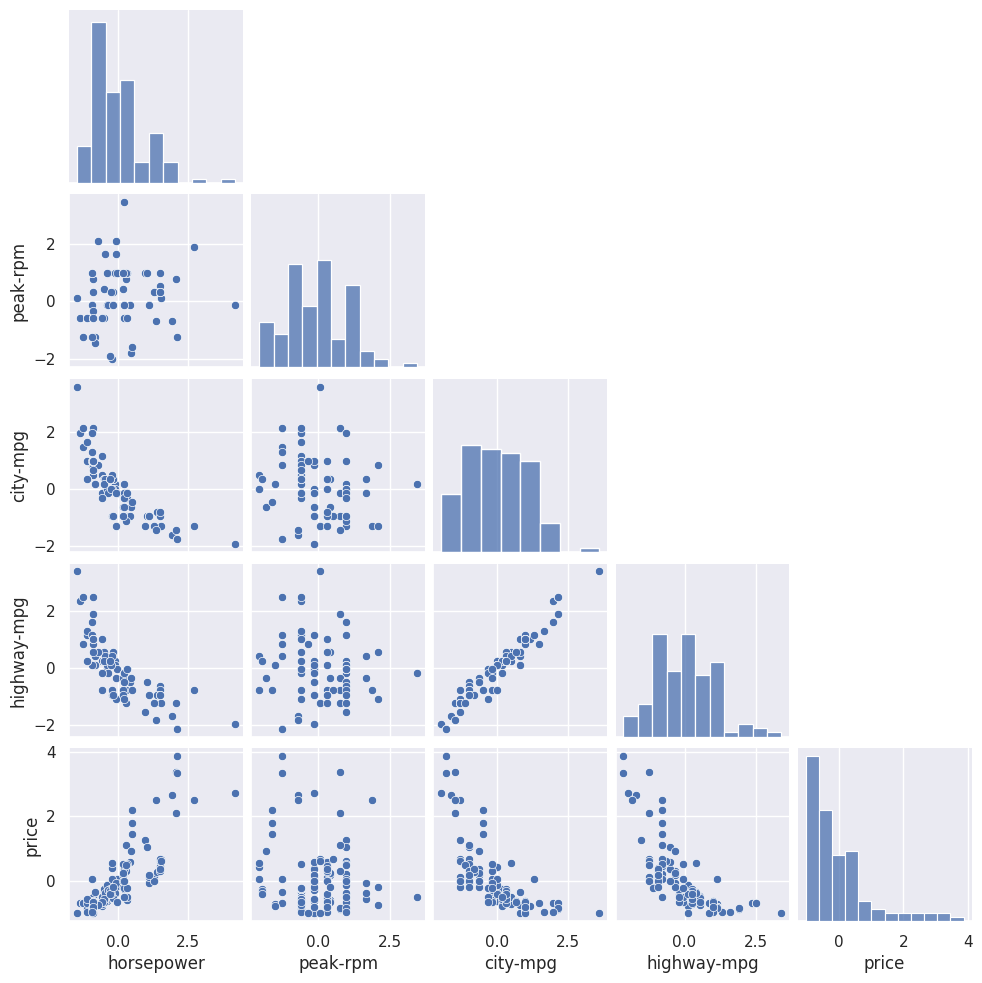

In [9]:
# YOUR CODE HERE
X_train_std_df = pd.DataFrame(X_train_std, columns = X_train.columns)
Y_train_std_df = pd.DataFrame(Y_train_std, columns = Y_train.columns)
df = pd.concat([X_train_std_df, Y_train_std_df], axis = 1)
sns.pairplot(df, height = 2.0, corner = True)
plt.show()

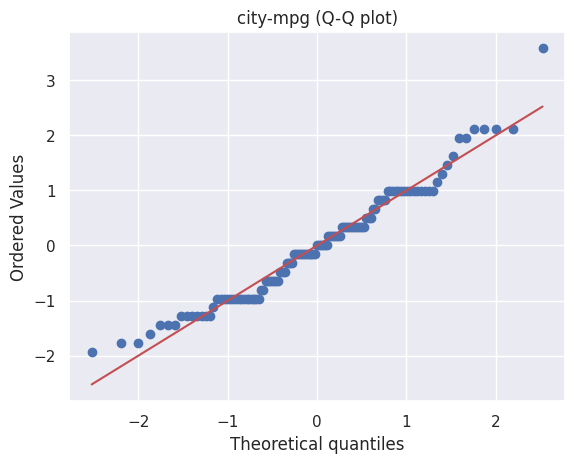

In [10]:
from scipy import stats

stats.probplot(X_train_std_df["city-mpg"], dist = "norm", plot = plt)
plt.title("city-mpg (Q-Q plot)")
plt.show()

To be considered as normal distribution, the histgram has features of symmetry and bell-shaped curve. Upon observation, city-mpg meets the criteria.

In addition, I use a Q-Q plot to compare the sample and theoretical normal distribution.

It is not necessary for both explantory and target variables to be normally distributed in order to brain a ML mode.

### <span style="color:chocolate">Exercise 8:</span> Correlation matrix (10 points)

In this exercise you will:

1. Plot a correlation matrix in the form of a heatmap to visualize the linear relationships between different features and outcome in the (X_train_std, Y_train) data. Hint: this example here is very useful: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    
2. Answer the following questions: 
 - Which two features are likely to be most redundant?
 - Which feature is likely to be least useful for predicting price?

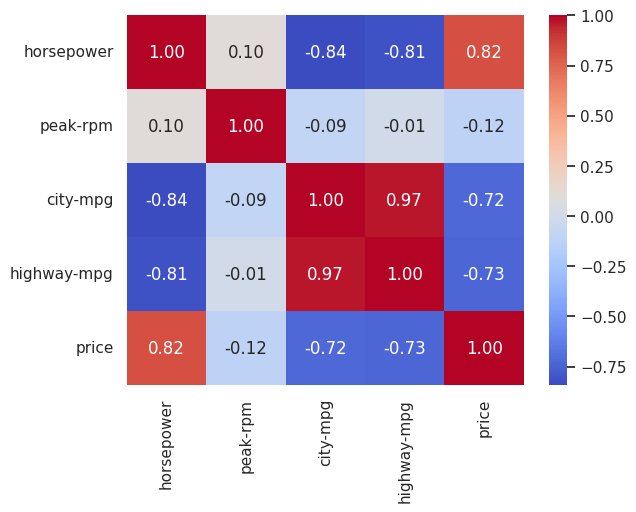

In [11]:
# YOUR CODE 
import seaborn as sns

X_train_std_df = pd.DataFrame(X_train_std, columns = X_train.columns)

# use Y_train_std instead of Y_train indicated by the question for reasonable result.
Y_train_std_df = pd.DataFrame(Y_train_std, columns = Y_train.columns)
df = pd.concat([X_train_std_df, Y_train_std_df], axis = 1)

sns.set_theme(style = "white")
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "coolwarm")
plt.show()

- Which two features are likely to be most redundant?<br>
With correlation coefficient of 0.97, city-mpg and highway-mpt demonstrates strong relationship together. 

- Which feature is likely to be least useful for predicting price?<br>
With correlation coefficient of -0.12, peak-rpm would be the least useful to predict price.

---
### Step 4: Modeling

### <span style="color:chocolate">Exercise 9:</span> Baseline model (5 points)

Let's start by evaluating a baseline model. Precisely, you'll use the average price of cars in the training set as our baseline model -- that is, the baseline always predicts the average price regardless of the input.

1. Implement this baseline using the Y_train_std data and print the average price. Note: You can revert the price variable to the original scale for interpretation purposes.

In [12]:
# YOUR CODE HERE
def baseline_model(X):
    avg_price_std = Y_train_std.mean()
    avg_price = y_scaler.inverse_transform(avg_price_std.reshape(-1, 1))
    return avg_price[0, 0]

print(f"baseline_model prediction = {baseline_model(X_train_std):.4f}")

baseline_model prediction = 13510.7815


### <span style="color:chocolate">Exercise 10:</span> Improvement over Baseline with TensorFlow (10 points)

Let's train a linear regression model much like we did in the previous assignment, but this time using TensorFlow. 

1. Fill in the <span style="color:green">NotImplemented</span> parts of the build_model() function below by following the instructions provided as comments. Hint: refer to Demo 3 in [bCourses/Modules/Live Session Demos](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) for an example.
2. Build and compile a model using the build_model() function and the (X_train_std, Y_train_std) data. Set learning_rate = 0.0001. Call the resulting object *model_tf*.
3. Train *model_tf* using the (X_train_std, Y_train_std) data. Set num_epochs = 5. Pass the (X_val_std, Y_val_std) data for validation. Hint: see the documentation behind the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method.
3. Generate a plot with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title. Hint: check what the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method returns.

More notes on point 1: the idea is to build a *computational graph* for linear regression, and then send data through it. There are many ways to build graphs, but [TenforFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) is recommended. 

In [13]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # linear regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units = 1,                      # output dim
      input_shape = [num_features],   # input dim
      use_bias = True,                # use a bias (intercept) param
      kernel_initializer = tf.ones_initializer, # initialize params to 1
      bias_initializer = tf.ones_initializer,   # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use SGD, which is actually mini-batch SGD
  optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)

  # Finally, compile the model. This finalizes the graph for training.
  # We specify the loss and the optimizer above
  model.compile(optimizer = optimizer, loss = "mean_squared_error")
    
  return model

In [14]:
tf.random.set_seed(0)
# 2. Build and compile model
# YOUR CODE HERE
model_tf = build_model(num_features = X_train_std.shape[1], learning_rate = 0.0001)

# 3. Fit the model
# YOUR CODE HERE
epoch_data = model_tf.fit(x = X_train_std, y = Y_train_std, epochs = 5, validation_data = (X_val_std, Y_val_std))

Epoch 1/5
4/4 [==============================] - 0s 45ms/step - loss: 6.1363 - val_loss: 6.5303
Epoch 2/5
4/4 [==============================] - 0s 10ms/step - loss: 6.1189 - val_loss: 6.5143
Epoch 3/5
4/4 [==============================] - 0s 11ms/step - loss: 6.1019 - val_loss: 6.4986
Epoch 4/5
4/4 [==============================] - 0s 7ms/step - loss: 6.0849 - val_loss: 6.4826
Epoch 5/5
4/4 [==============================] - 0s 12ms/step - loss: 6.0680 - val_loss: 6.4672


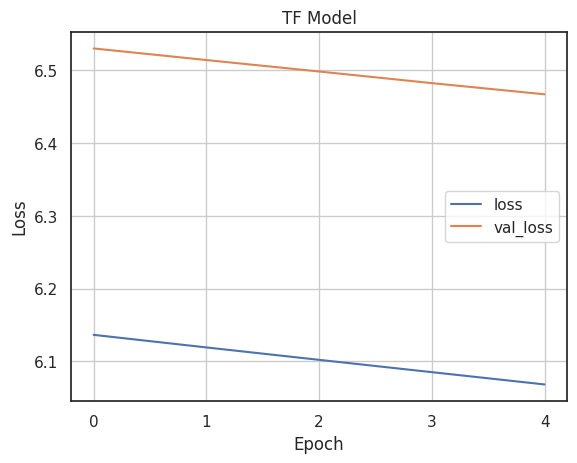

In [15]:
plt.plot(epoch_data.history["loss"], label = "loss")
plt.plot(epoch_data.history["val_loss"], label = "val_loss")
plt.title("TF Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(range(5))
plt.legend()
plt.grid()
plt.show()

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning is a crucial step in optimizing ML models. It involves systematically adjusting hyperparameters such as learning rate, number of epochs, and optimizer to find the model configuration that leads to the best generalization performance.

This tuning process is typically conducted by monitoring the model's performance on the validation vs. training set. It's important to note that using the test set for hyperparameter tuning can compromise the integrity of the evaluation process by violating the assumption of "blindness" of the test data.

### <span style="color:chocolate">Exercise 11:</span> Hyperparameter tuning (10 points)

1. Fine-tune the hyperparameters of *model_tf* to determine the setup that yields the most optimal generalization performance. Feel free to explore various values for the hyperparameters. Hint: ask your instructors and TAs for help if in doubt.

After identifying your preferred model configuration, print the following information:

2. The learned parameters of the model (this should include the bias term). Hint: use  <span style="color:chocolate">model_tf.layers[0].get_weights()</span>.
3. The loss at the final epoch on both the training and validation datasets;
4. The percentage difference between the losses observed on the training and validation datasets.


Please note that we will consider 'optimal model configuration' any last-epoch loss that is below 0.35.

In [16]:
tf.random.set_seed(0)
# YOUR CODE HERE

learning_rates = [0.01, 0.001, 0.0001]
num_epochs = [5, 10, 25, 50, 100]
results = []

for learning_rate in learning_rates:
    for epochs in num_epochs:
        model_tf = build_model(num_features = X_train_std.shape[1], learning_rate = learning_rate)
        epoch_data = model_tf.fit(x = X_train_std, y = Y_train_std, epochs = epochs, validation_data = (X_val_std, Y_val_std))
        results.append({
            "learning_rate": learning_rate,
            "epochs": epochs,
            "loss": round(epoch_data.history["loss"][-1], 4),
            "val_loss": round(epoch_data.history["val_loss"][-1], 4),
            "w": model_tf.layers[0].get_weights()
        })

Epoch 1/5
4/4 [==============================] - 0s 26ms/step - loss: 5.6026 - val_loss: 5.1555
Epoch 2/5
4/4 [==============================] - 0s 10ms/step - loss: 4.2845 - val_loss: 4.1518
Epoch 3/5
4/4 [==============================] - 0s 10ms/step - loss: 3.3700 - val_loss: 3.4172
Epoch 4/5
4/4 [==============================] - 0s 9ms/step - loss: 2.7152 - val_loss: 2.8560
Epoch 5/5
4/4 [==============================] - 0s 9ms/step - loss: 2.2374 - val_loss: 2.4247
Epoch 1/10
4/4 [==============================] - 0s 37ms/step - loss: 5.6026 - val_loss: 5.1555
Epoch 2/10
4/4 [==============================] - 0s 9ms/step - loss: 4.2845 - val_loss: 4.1518
Epoch 3/10
4/4 [==============================] - 0s 9ms/step - loss: 3.3700 - val_loss: 3.4172
Epoch 4/10
4/4 [==============================] - 0s 9ms/step - loss: 2.7152 - val_loss: 2.8560
Epoch 5/10
4/4 [==============================] - 0s 9ms/step - loss: 2.2374 - val_loss: 2.4247
Epoch 6/10
4/4 [=========================

In [17]:
best_param = min(results, key = lambda n: n["val_loss"])

print(f"Learn Parameters: {best_param['w']}")
print(f"Loss = {best_param['loss']:.4f}")
print(f"Validation Loss = {best_param['val_loss']:.4f}")
print(f"Loss % difference = {(best_param['val_loss'] / best_param['loss'] - 1):.2%}%")

Learn Parameters: [array([[ 0.89483917],
       [-0.2073552 ],
       [ 0.12073503],
       [-0.10798234]], dtype=float32), array([0.00212037], dtype=float32)]
Loss = 0.2823
Validation Loss = 0.3430
Loss % difference = 21.50%%


---
### Step 6: Evaluation and Generalization


Now that you've determined the optimal set of hyperparameters, it's time to evaluate your optimized model on the test data to gauge its performance in real-world scenarios, commonly known as inference.

### <span style="color:chocolate">Exercise 12:</span> Computing MSE (10 points)

1. Calculate MSE on both (X_train_std, Y_train_std) and (X_test_std, Y_test_std) datasets. Hint: You can utilize the <span style="color:chocolate">model.evaluate()</span> method provided by tf.keras.

2. Does the model demonstrate strong generalization capabilities? Provide an explanation based on your observations.

4. Generate a plot to visualize the accuracy of the predictions. Plot the actual (observed) Y_test values on the x-axis and the predicted Y_test values on the y-axis. Additionally, include a 45-degree line in the plot for reference. Ensure that the plot contains appropriate axis labels and a title. Provide commentary on the model's fit based on this visualization. Hint: You can utilize the <span style="color:chocolate">model.predict()</span> method available in tf.keras. 

In [18]:
# YOUR CODE HERE
mse_train = model_tf.evaluate(X_train_std, Y_train_std)
mse_test = model_tf.evaluate(X_test_std, Y_test_std)
print(f"{mse_train = :.4f}, {mse_test =:.4f}")

2/2 [==============================] - 0s 3ms/step - loss: 6.7764
mse_train = 4.6964, mse_test =6.7764


MSE of Test (6.7764) is slightly higher than MSE of Training (4.6964), which indicates reasonable generalization.

In [19]:
best_model = build_model(num_features = X_train_std.shape[1], learning_rate = best_param["learning_rate"])
best_model.fit(x = X_train_std, y = Y_train_std, epochs = best_param["epochs"], validation_data = (X_val_std, Y_val_std))
Y_test_std_predict = best_model.predict(x = X_test_std)

Epoch 1/100
4/4 [==============================] - 0s 37ms/step - loss: 5.6026 - val_loss: 5.1555
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 4.2845 - val_loss: 4.1518
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 3.3700 - val_loss: 3.4172
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 2.7152 - val_loss: 2.8560
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 2.2374 - val_loss: 2.4247
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 1.8834 - val_loss: 2.0925
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 1.6134 - val_loss: 1.8267
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 1.4033 - val_loss: 1.6098
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 1.2321 - val_loss: 1.4260
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0906 - val_loss: 1.2767
Epoch 11/100
4/4 [========

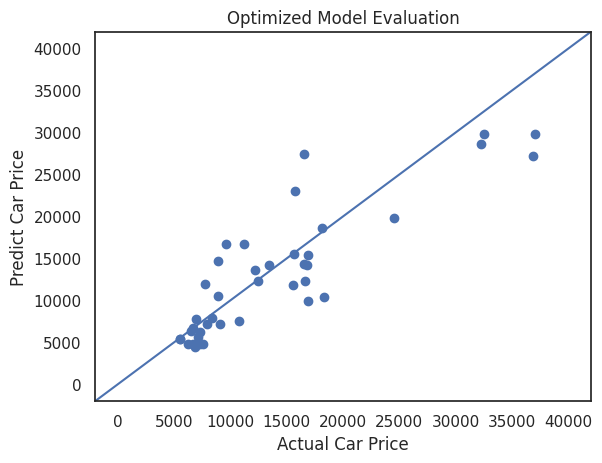

In [76]:
Y_test_predict = y_scaler.inverse_transform(Y_test_std_predict)

plt.scatter(x = Y_test, y = Y_test_predict)
plt.axline([0, 0], [40000, 40000])
plt.title("Optimized Model Evaluation")
plt.xlabel("Actual Car Price")
plt.ylabel("Predict Car Price")
plt.show()

The graph shows the model predicts reasonablly well for cars under $20,000. However, it tends to under predicts cars whose price is above $25,000.

----
### <span style="color:chocolate">Bonus question</span> (20 points)

In Exercise 12, you reported an aggregated MSE. Let's revisit the exercise by:

1. Conducting a subgroup model evaluation. More precisely, compute the test data MSE based on various car subgroups such as make, engine size, fuel type, etc.

2. Answering the question: is the model "fair" to your chosen car subgroups in our data?

In [ ]:
# YOUR CODE HERE